<a href="https://colab.research.google.com/github/vmjs1234/TIMEGPT-TABULA-RDL/blob/main/fine_tune_timegpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#| hide
!pip install -Uqq nixtla

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
from nixtla import NixtlaClient
from utilsforecast.losses import mae, mse
from utilsforecast.evaluation import evaluate

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [4]:
nixtla_client = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    api_key =  'nixak-fcqNO2C0XCBQQozD5OW6GzOw4wmvrNCoP2xTklrHEThEU8vvytDeHZulh4Ja99fmFgnTyywsPfkVJzxh'
)

In [5]:
df = pd.read_csv('infy_stock.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
1,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
3,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
4,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


#FINE TUNING

In [7]:
import pandas as pd
from nixtla import NixtlaClient
from utilsforecast.losses import mae, mse
from utilsforecast.evaluation import evaluate

nixtla_client = NixtlaClient(
    api_key='nixak-fcqNO2C0XCBQQozD5OW6GzOw4wmvrNCoP2xTklrHEThEU8vvytDeHZulh4Ja99fmFgnTyywsPfkVJzxh'
)

df = pd.read_csv('infy_stock.csv')

# 1. Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# 2. Check for missing or duplicate dates
print("Missing dates:", df['Date'].isnull().sum())
print("Duplicate dates:", df['Date'].duplicated().sum())

# 3. Resample the data to a regular frequency (e.g., daily)
# If your data is supposed to be daily, you can use:
df = df.set_index('Date').resample('D').ffill().reset_index()
# If your data should have another frequency (e.g. weekly 'W', monthly 'M', business days 'B') adjust the resample rule accordingly.
# ffill() forward fills missing values after resampling.

# 4. Check if the frequency can be inferred now
inferred_freq = pd.infer_freq(df['Date'])
print("Inferred frequency:", inferred_freq)

# 5. If the frequency is still None, you may need to further investigate the data or specify the frequency manually.
# For example, if you know the data is daily:
# timegpt_fcst_finetune_df = nixtla_client.forecast(df=df, h=12, finetune_steps=10, time_col='Date', target_col='Close', freq='D')

timegpt_fcst_finetune_df = nixtla_client.forecast(
    df=df, h=12, finetune_steps=10,
    time_col='Date', target_col='Close',
)

Missing dates: 0
Duplicate dates: 0
Inferred frequency: D


/usr/local/lib/python3.10/dist-packages/nixtla/nixtla_client.py:360: UserWarning: `df` contains the following exogenous features: ['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'], but `X_df` was not provided and they were not declared in `hist_exog_list`. They will be ignored.
  warnings.warn(


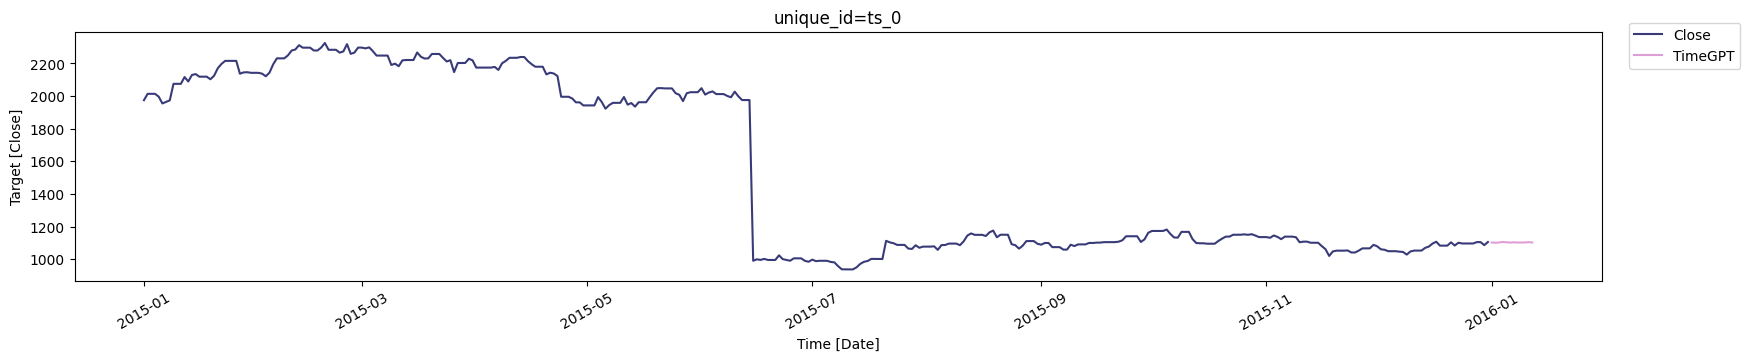

In [8]:
nixtla_client.plot(
    df, timegpt_fcst_finetune_df,
    time_col='Date', target_col='Close',
)